In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


In [3]:
tickers = ['PG','MSFT','F','GE'] #list
mydata=pd.DataFrame()
for t in tickers: #for loop 
    mydata[t]=wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6543 entries, 1995-01-03 to 2020-12-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6543 non-null   float64
 1   MSFT    6543 non-null   float64
 2   F       6543 non-null   float64
 3   GE      6543 non-null   float64
dtypes: float64(4)
memory usage: 255.6 KB


In [5]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.215732,2.394761,4.242091,4.058363
1995-01-04,8.149876,2.412169,4.356228,4.058363
1995-01-05,8.034625,2.372380,4.318182,4.068309
1995-01-06,8.051086,2.412169,4.318182,4.048415
1995-01-09,8.018162,2.397249,4.394274,4.008627


In [6]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-12-18,139.039993,218.589996,8.95,10.81
2020-12-21,137.520004,222.589996,8.93,10.77
2020-12-22,136.550003,223.940002,8.79,10.61
2020-12-23,136.339996,221.020004,8.99,10.86
2020-12-24,137.720001,222.750000,8.86,10.65


In [9]:
mydata.iloc[0]

PG      8.215732
MSFT    2.394761
F       4.242091
GE      4.058363
Name: 1995-01-03 00:00:00, dtype: float64

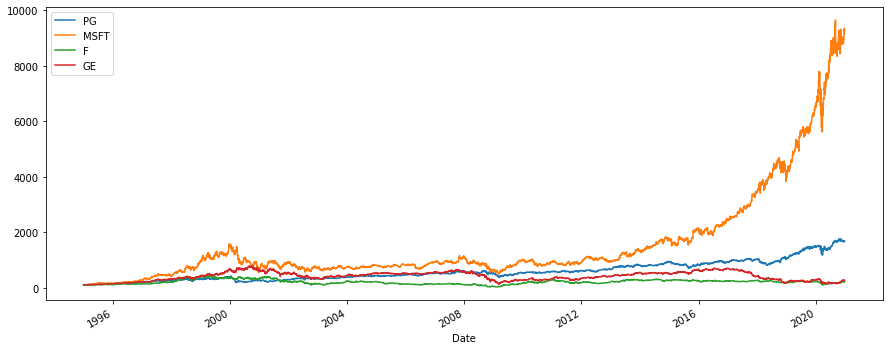

In [38]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6)); #normalizing/normalization the stock prices by multiplying by 100
plt.show()

In [14]:
mydata.loc['1995-01-03']

PG      8.215732
MSFT    2.394761
F       4.242091
GE      4.058363
Name: 1995-01-03 00:00:00, dtype: float64

In [ ]:
#Calculating the return of a portfolio securities

In [21]:
returns =(mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004089,-0.006185,0.017621,-0.009828


In [41]:
weights=np.array([0.25,0.25,0.25,0.25])

In [45]:
np.dot(returns, weights)

array([        nan,  0.00653977, -0.00922984, ..., -0.00788056,
        0.00793466, -0.00396211])

In [47]:
annual_returns=returns.mean()*250
annual_returns

PG      0.133370
MSFT    0.223246
F       0.107731
GE      0.088147
dtype: float64

In [49]:
np.dot(annual_returns,weights)

0.13812344271834576

In [35]:
pfolio_1=str(round(np.dot(annual_returns, weights),4)*100)+ '%'
print (pfolio_1)

13.81%


In [36]:
weights_2=np.array([0.4,0.4,0.15,0.05])

In [37]:
pfolio_2=str(round(np.dot(annual_returns, weights_2),4)*100)+ '%'
print (pfolio_1)
print (pfolio_2)


13.81%
16.32%
